In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [14]:
train_data = pd.read_csv("hw1_18_train.dat",
                         names = ["x{0}".format(i) for i in range(1,5)]+["y"],
                         delim_whitespace=True)
train_data.insert(0,"x0",1)
x = np.array(train_data.iloc[:,:-1])
y = np.array(train_data["y"])

In [15]:
def sign(n):
    if n>0:
        return 1
    else:
        return -1

In [16]:
def verify(w, dx ,dy):
    n = len(dy)
    error = 0
    products = np.sum(w*dx, axis = 1)
    for i in xrange(n):
        if sign(products[i]) != sign(dy[i]):
            error +=1
    error = float(error)
    return error / n

def pocket(w0, update_number, seed = 0, learning_rate = 1.0):
    np.random.seed(seed)
    w=w0
    n = len(y)
    learning_rate_vector = np.zeros_like(w0)+learning_rate
    learning_rate_vector[0] = 1.0
    error_rate = 1.0
    pick = np.random.randint(0,n,update_number)
    for i in pick:
        product = sum(x[i]*w)
        if not sign(product) == sign(y[i]):
            w_new = w + x[i]*learning_rate_vector*y[i]
            error_rate_new = verify(w_new, x, y)
            if error_rate_new < error_rate:
                w = w_new
                error_rate = error_rate_new
    return np.array(w)

def PLA(w0, update_number, seed = 0, learning_rate = 1.0):
    iter_number = 0
    w=w0
    n = len(y)
    learning_rate_vector = np.zeros_like(w0)+learning_rate
    learning_rate_vector[0] = 1.0
    j=-1
    index_order = range(n)
    random.seed(seed)
    random.shuffle(index_order)
    while iter_number < update_number:
        while True:
            j+=1
            if not j <n:
                j=0
            i = index_order[j]
            product = sum(x[i]*w)
            if not sign(product) == sign(y[i]):
                w = w + x[i]*learning_rate_vector*y[i]
                iter_number +=1
                break
    return np.array(w)

In [17]:
test_data = pd.read_csv("hw1_18_test.dat",
                        names = ["x{0}".format(i) for i in range(1,5)]+["y"],
                        delim_whitespace=True)
test_data.insert(0,"x0",1)
tx = np.array(test_data.iloc[:,:-1])
ty = np.array(test_data["y"])

## Problem 18

In [18]:
error_rates_p18 = []
w0 = np.zeros((5,))
for seed in range(2000):
    w=pocket(w0, 50, seed=seed)
    error_rates_p18.append(verify(w,tx,ty))

Average Error Rate: 0.289486


(array([   86.,   308.,  1008.,   388.,   168.,    38.,     0.,     0.,
            0.,     4.]),
 array([ 0.13  ,  0.1872,  0.2444,  0.3016,  0.3588,  0.416 ,  0.4732,
         0.5304,  0.5876,  0.6448,  0.702 ]),
 <a list of 10 Patch objects>)

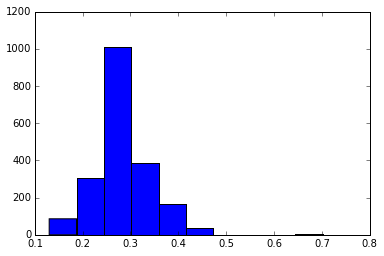

In [19]:
print "Average Error Rate:", np.average(error_rates_p18)
plt.hist(error_rates_p18)

## Problem 19

In [20]:
error_rates_p19 = []
w0 = np.zeros((5,))
for seed in range(2000):
    w=PLA(w0, 50, seed=seed)
    error_rates_p19.append(verify(w,tx,ty))

Average Error Rate: 0.362589


(array([ 151.,  348.,  491.,  218.,   93.,  106.,  126.,  106.,  132.,  229.]),
 array([ 0.108 ,  0.1674,  0.2268,  0.2862,  0.3456,  0.405 ,  0.4644,
         0.5238,  0.5832,  0.6426,  0.702 ]),
 <a list of 10 Patch objects>)

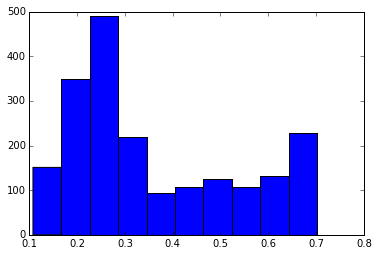

In [21]:
print "Average Error Rate:", np.average(error_rates_p19)
plt.hist(error_rates_p19)

## Problem 20

In [22]:
error_rates_p20 = []
w0 = np.zeros((5,))
for seed in range(2000):
    w=pocket(w0, 100, seed=seed)
    error_rates_p20.append(verify(w,tx,ty))

Average Error Rate: 0.288441


(array([  23.,  100.,  160.,  275.,  808.,  317.,  146.,  103.,   50.,   18.]),
 array([ 0.13  ,  0.1638,  0.1976,  0.2314,  0.2652,  0.299 ,  0.3328,
         0.3666,  0.4004,  0.4342,  0.468 ]),
 <a list of 10 Patch objects>)

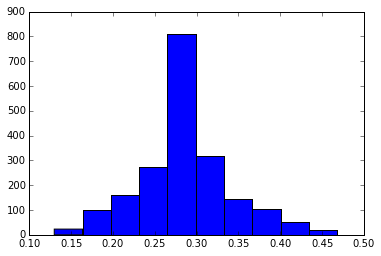

In [23]:
print "Average Error Rate:", np.average(error_rates_p20)
plt.hist(error_rates_p20)